# __Exploring the Mature Communities in Satellite Cities of Sacramento Metropolitan__

## Data Processing & Module Pre-Installation

In [38]:
import pandas as pd
df = pd.read_csv('Sac.csv')
df

,Neighborhood,Zip
0,Carmichael,95608
1,NaN,nan
2,Citrus Heights,95610
3,NaN,nan
4,Elk Grove,95624
...,...,...
256,Sacramento,95899
257,NaN,nan
258,Elk Grove,95757
259,NaN,nan


In [39]:
df = df.dropna() # Clean N/A 
df

,Neighborhood,Zip
0,Carmichael,95608
2,Citrus Heights,95610
4,Elk Grove,95624
6,Fair Oaks,95628
8,Folsom,95630
...,...,...
252,Sacramento,95866
254,Sacramento,95867
256,Sacramento,95899
258,Elk Grove,95757


In [40]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [41]:
!conda install -c conda-forge geocoder --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [42]:
df = pd.read_csv('sac2.csv').dropna()
df

,coordinate,Borough,Zip
0,38.58/-121.492,Sacramento,95814
2,38.628/-121.329,Carmichael,95608
4,38.695/-121.269,Citrus Heights,95610
6,38.423/-121.36,Elk Grove,95624
8,38.655/-121.261,Fair Oaks,95628
...,...,...,...
254,38.596/-121.398,Sacramento,95866
256,38.582/-121.493,Sacramento,95867
258,38.538/-121.555,Sacramento,95899
260,38.408/-121.429,Elk Grove,95757


In [43]:
df3 = df['coordinate'].str.split(pat = '/', expand = True) # Split Coordinates into Lat and Long
df3

,0,1
0,38.58,-121.492
2,38.628,-121.329
4,38.695,-121.269
6,38.423,-121.36
8,38.655,-121.261
...,...,...
254,38.596,-121.398
256,38.582,-121.493
258,38.538,-121.555
260,38.408,-121.429


In [44]:
df4 = df.drop(columns = ['coordinate'])
pd.options.display.float_format = '{:.0f}'.format
df4['latitude'] = df3[0]
df4['longitude'] = df3[1]
df4

,Borough,Zip,latitude,longitude
0,Sacramento,95814,38.58,-121.492
2,Carmichael,95608,38.628,-121.329
4,Citrus Heights,95610,38.695,-121.269
6,Elk Grove,95624,38.423,-121.36
8,Fair Oaks,95628,38.655,-121.261
...,...,...,...,...
254,Sacramento,95866,38.596,-121.398
256,Sacramento,95867,38.582,-121.493
258,Sacramento,95899,38.538,-121.555
260,Elk Grove,95757,38.408,-121.429


In [45]:
# Remove entry regarding with Sacramento main city
df5 = df4[df4['Borough'] != 'Sacramento'] 
df5

,Borough,Zip,latitude,longitude
2,Carmichael,95608,38.628,-121.329
4,Citrus Heights,95610,38.695,-121.269
6,Elk Grove,95624,38.423,-121.36
8,Fair Oaks,95628,38.655,-121.261
10,Folsom,95630,38.671,-121.153
...,...,...,...,...
230,Sloughhouse,95683,38.514,-121.096
232,Rancho Cordova,95741,38.589,-121.302
234,Elk Grove,95759,38.407,-121.375
236,Folsom,95763,38.678,-121.175


In [46]:
df4.to_csv('SacProcess.csv')

In [47]:
df5.to_csv('SacNeighProcess.csv')

## Getting Information from Foursquare API

In [48]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [49]:
CLIENT_ID = 'QAUUSJFZ4T2OKXNCXG5EILOE0ULT54CMHEJ3KPKRK5PFG015' # your Foursquare ID
CLIENT_SECRET = 'ZZ2AJC0YSRIOZHIC2RWXMNNAH15GXMGH5PGAA04AU1UGUH0D' # your Foursquare Secret
VERSION = '20200120' # Foursquare API version

In [50]:
import requests
from pandas.io.json import json_normalize

### Json to Dataframe

In [51]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Exploring Neighborhood in Sacramento

In [52]:
LIMIT = 100

In [53]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'], 
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [54]:
Sac_venues = getNearbyVenues(names=df5['Borough'],
                                   latitudes=df5['latitude'],
                                   longitudes=df5['longitude'])
Sac_venues.shape

Carmichael
Citrus Heights
Elk Grove
Fair Oaks
Folsom
Rancho Cordova
Elk Grove
Antelope
Citrus Heights
Courtland
Citrus Heights
Elverta
Galt
Herald
Hood
Isleton
Mather
North Highlands
Orangevale
Rio Linda
Ryde
Walnut Grove
Wilton
Rancho Cordova
Carmichael
Mcclellan
Represa
Sloughhouse
Rancho Cordova
Elk Grove
Folsom
Elk Grove


(1433, 7)

In [79]:
pd.set_option('display.max_rows', 500)

In [80]:
Sac_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Carmichael,38.628,-121.329,Starbucks,39,-121,Coffee Shop
1,Carmichael,38.628,-121.329,Carmichael Park,39,-121,Park
2,Carmichael,38.628,-121.329,Carmichael Park Farmers Market,39,-121,Farmers Market
3,Carmichael,38.628,-121.329,Blue Sky Chinese Resturaunt,39,-121,Chinese Restaurant
4,Carmichael,38.628,-121.329,Roma's Pizza,39,-121,Pizza Place
...,...,...,...,...,...,...,...
1428,Elk Grove,38.408,-121.429,Ehrhardt Oaks Park,38,-121,Park
1429,Elk Grove,38.408,-121.429,Laguna Reserve Marketplace,38,-121,Shopping Plaza
1430,Elk Grove,38.408,-121.429,Crossfit Elk Grove,38,-121,Gym
1431,Elk Grove,38.408,-121.429,Elk Grove Donuts,38,-121,Donut Shop


## Grouping Venues Based on Dining, Commerce and Leisure

In [77]:
Sac_venue = Sac_venues.groupby(['Neighborhood', 'Venue Category']).count()
pd.set_option('display.max_rows', 500)
Sac_venue.drop(columns = ['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue Latitude', 'Venue Longitude'], inplace = True)
Sac_venue

Venue
Neighborhood Venue Category                   
Antelope     Automotive Shop                 2
             BBQ Joint                       1
             Bank                            1
             Baseball Field                  1
             Basketball Stadium              1
...                                        ...
Sloughhouse  Park                            1
             Tourist Information Center      1
Walnut Grove Bed & Breakfast                 1
             Campground                      1
Wilton       Farm                            1

[651 rows x 1 columns]

### Overall Amenity 

In [57]:
values = ['coffee','gym','pub', 'bar', 'tea', 'plaza', 'cinema', 'theater','resturant','breakfast','pizza', 'taco', 'burger','sushi','sandwish', 'market','store','shop','bank']
new_df = Sac_venues[Sac_venues['Venue Category'].str.contains('|'.join(values), case = False)]
new_df.shape

(695, 7)

In [58]:
new_grouped = Sac_venues.groupby(['Neighborhood']).count()
new_grouped.drop(columns = ['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue Latitude', 'Venue Longitude','Venue Category'], inplace = True)
new_grouped.rename(columns = {'Venue':'Count'}, inplace = True)
new_grouped.sort_values(by = ['Count'], ascending = False, inplace = True)
new_groupedsort = new_grouped.nlargest(10, ['Count'])
new_groupedsort
invert = new_groupedsort.transpose()
invert['Total'] = invert.sum(axis = 1)
invert

Neighborhood,Elk Grove,Citrus Heights,Rancho Cordova,Carmichael,Folsom,Fair Oaks,North Highlands,Mcclellan,Antelope,Orangevale,Total
Count,328,218,205,157,152,72,63,47,43,41,1326


In [82]:
new_grouped

,Count
Neighborhood,
Elk Grove,328
Citrus Heights,218
Rancho Cordova,205
Carmichael,157
Folsom,152
Fair Oaks,72
North Highlands,63
Mcclellan,47
Antelope,43


### Grouped by food

In [59]:
values_food = ['resturant', 'breakfast','pizza', 'taco', 'burger','sushi','sandwish']
df_food = Sac_venues[Sac_venues['Venue Category'].str.contains('|'.join(values_food), case = False)]
pd.set_option('display.max_rows', 10)
df_food.shape

(143, 7)

In [60]:
food_grouped = df_food.groupby(['Neighborhood']).count()
food_grouped.drop(columns = ['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue Latitude', 'Venue Longitude','Venue Category'], inplace = True)
food_grouped.rename(columns = {'Venue':'Dining'}, inplace = True)
food_groupedsort = food_grouped.nlargest(10, ['Dining'])
food_groupedsort

,Dining
Neighborhood,
Elk Grove,28
Citrus Heights,26
Rancho Cordova,25
Carmichael,15
Folsom,14
Fair Oaks,6
North Highlands,6
Antelope,5
Orangevale,5


### Grouped by Market

In [61]:
values_mar = ['market','store','shop','bank']
df_mar = Sac_venues[Sac_venues['Venue Category'].str.contains('|'.join(values_mar), case = False)]
df_mar = df_mar[~df_mar['Venue Category'].str.contains('Coffee')]
pd.set_option('display.max_rows', 10)
df_mar.shape

(401, 7)

In [62]:
popu = {}

In [63]:
mar_grouped = df_mar.groupby(['Neighborhood']).count()
mar_grouped.drop(columns = ['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue Latitude', 'Venue Longitude','Venue Category'], inplace = True)
mar_grouped.rename(columns = {'Venue':'Market'}, inplace = True)
#mar_grouped.sort_values(by = ['Market'], ascending = False, inplace = True)
mar_groupedsort = mar_grouped.nlargest(10, ['Market'])
mar_groupedsort

,Market
Neighborhood,
Elk Grove,102
Citrus Heights,68
Rancho Cordova,68
Carmichael,53
Folsom,30
Fair Oaks,18
Antelope,16
North Highlands,14
Mcclellan,9


### Grouped by Leisure

In [64]:
values_lei = ['coffee','gym','pub', 'bar', 'tea', 'plaza', 'cinema', 'theater']
df_lei = Sac_venues[Sac_venues['Venue Category'].str.contains('|'.join(values_mar), case = False)]
pd.set_option('display.max_rows', 10)
df_lei.shape

(455, 7)

In [65]:
lei_grouped = df_lei.groupby(['Neighborhood']).count()
lei_grouped.drop(columns = ['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue Latitude', 'Venue Longitude','Venue Category'], inplace = True)
lei_grouped.rename(columns = {'Venue':'Leisure'}, inplace = True)
#lei_grouped.sort_values(by = ['Leisure'], ascending = False, inplace = True)
lei_groupedsort = lei_grouped.nlargest(10, ['Leisure'])
lei_groupedsort

,Leisure
Neighborhood,
Elk Grove,121
Rancho Cordova,76
Citrus Heights,72
Carmichael,57
Folsom,37
Fair Oaks,23
Antelope,18
North Highlands,16
Mcclellan,11


In [66]:
lei_grouped['Dining'] = food_grouped['Dining']
lei_grouped['Market'] = mar_grouped['Market']
lei_grouped['Total'] = lei_grouped.sum(axis = 1)
Total_df = lei_grouped.nlargest(10, ['Total'])
Total_df

,Leisure,Dining,Market,Total
Neighborhood,,,,
Elk Grove,121,28,102,251
Rancho Cordova,76,25,68,169
Citrus Heights,72,26,68,166
Carmichael,57,15,53,125
Folsom,37,14,30,81
Fair Oaks,23,6,18,47
Antelope,18,5,16,39
North Highlands,16,6,14,36
Mcclellan,11,4,9,24


In [67]:
reverse = Total_df.transpose()
reverse.drop('Total', axis = 0, inplace = True)
reverse

Neighborhood,Elk Grove,Rancho Cordova,Citrus Heights,Carmichael,Folsom,Fair Oaks,Antelope,North Highlands,Mcclellan,Orangevale
Leisure,121,76,72,57,37,23,18,16,11,7
Dining,28,25,26,15,14,6,5,6,4,5
Market,102,68,68,53,30,18,16,14,9,7


## Visulization

In [68]:
import numpy as np

In [69]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

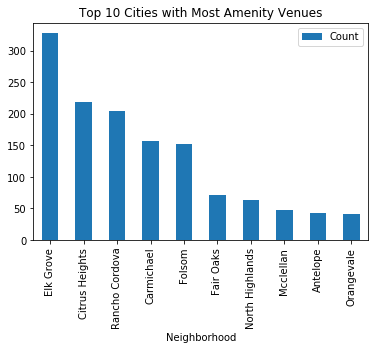

In [70]:
new_groupedsort.plot(kind = 'bar')
plt.title('Top 10 Cities with Most Amenity Venues')
plt.show()

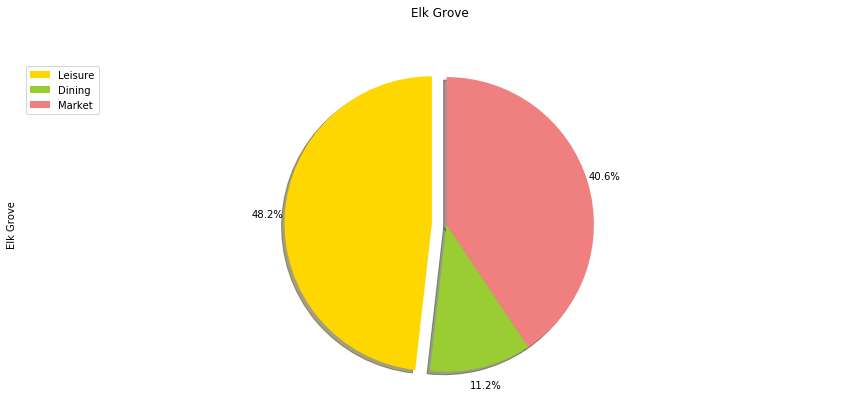

In [71]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0] # ratio for each continent with which to offset each wedge.

reverse['Elk Grove'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Elk Grove', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=reverse.index, loc='upper left') 

plt.show()

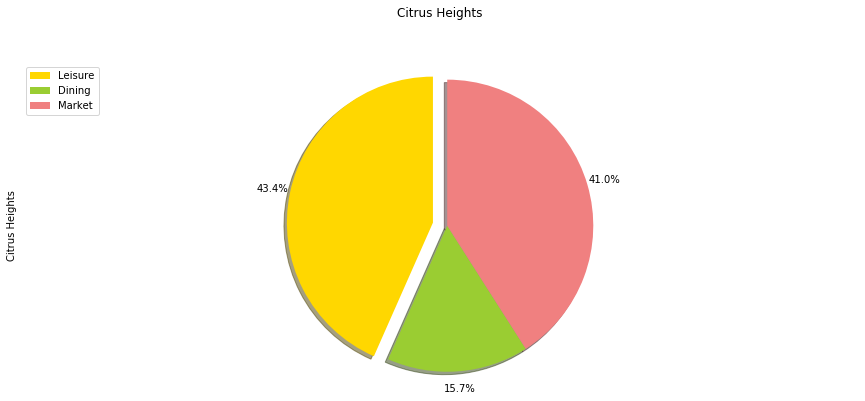

In [72]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0] # ratio for each continent with which to offset each wedge.

reverse['Citrus Heights'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Citrus Heights', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=reverse.index, loc='upper left') 

plt.show()

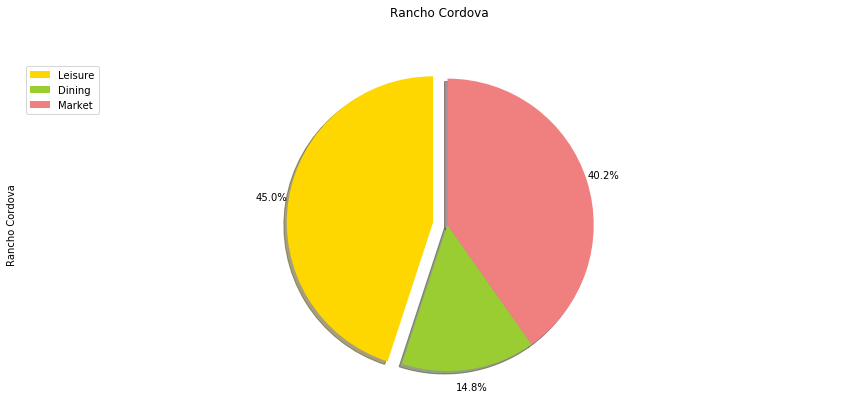

In [73]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0] # ratio for each continent with which to offset each wedge.

reverse['Rancho Cordova'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Rancho Cordova', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=reverse.index, loc='upper left') 

plt.show()

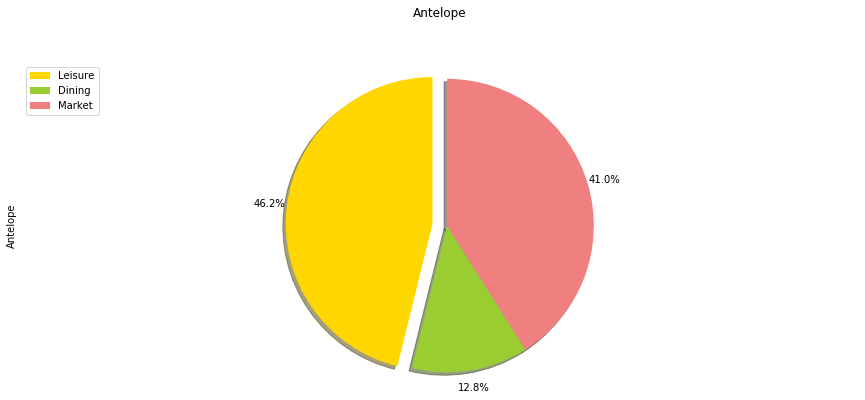

In [74]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0] # ratio for each continent with which to offset each wedge.

reverse['Antelope'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Antelope', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=reverse.index, loc='upper left') 

plt.show()

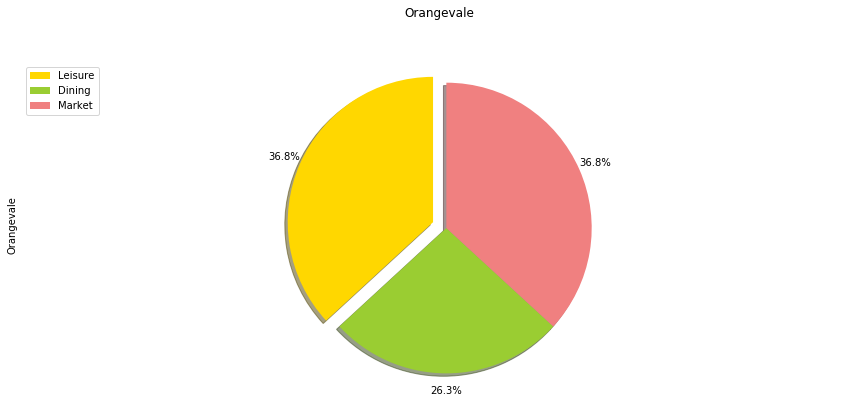

In [85]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0] # ratio for each continent with which to offset each wedge.

reverse['Orangevale'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Orangevale', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=reverse.index, loc='upper left') 

plt.show()